# review_ML/DL

* 다음의 데이터를 이용하여 모델링 복습을 해 봅시다.
    * 데이터와 기본 라이브러리만 작성되어 있습니다.
    * 전처리와 모델링의 틀을 제공합니다.
    * 여러분이 가장 자신 있는 알고리즘을 이용하여 모델링하시오.
        * 가능하다면 튜닝도 시도하시오.
    * 성능 평가를 합니다.

## 1.환경준비

### 1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2) 데이터 로딩

In [2]:
#신용대출 데이터
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/credit_all.csv'
data = pd.read_csv(path)
data.loc[data['Payment'] == 4, 'Payment'] = 3
data.head()


,Creditability,AccountBalance,Duration,Payment,Purpose,CreditAmount,Employment,SexMarital,CurrentAddress,MostValuableAsset,Age,Apartment,CreditCount,Occupation,Dependents,Telephone,ForeignWorker
0,1,3,24,2,0,1249,2,4,2,1,28,2,1,3,1,1,1
1,1,2,9,2,0,276,3,4,4,1,22,1,1,2,1,1,1
2,1,1,18,3,2,1049,2,2,4,2,21,1,1,3,1,1,1
3,1,1,24,3,1,6419,5,2,4,4,44,3,2,4,2,2,1
4,1,3,12,2,2,1424,5,2,4,1,55,2,1,4,1,2,1


|	칼럼명	|	설명	|	 	|	값 의미	|
|	-----	|	-----	|	-----	|	-----	|
|	Creditability	|	Creditability(Target)	|	향후 신용도	|	0 : Bad, 1 : Good	|
|	AccountBalance	|	Account Balance	|	은행잔고	|	1: No account, 2 : None (No balance), 3 : Some Balance	|
|	Duration	|	Duration of Credit (month)	|	신청한 대출기간(월)	|	숫자	|
|	Payment	|	Payment Status of Previous Credit	|	과거 대출 납입 상태	|	0 : 연체, 1 : 기타신용, 2 : 완납, 3 : 정상 대출상환 중 |
|	Purpose	|	Purpose	|	신청한 대출목적	|	1 : New Car , 2 : Used Car , 3 : Furniture , 4 : TV , 5 : Appliances , 6 : Repair , 8 : Vacation , 9 :Retraining , 10 : Business , 0 : Other	|
|	CreditAmount	|	Credit Amount($)	|	신청한 대출금액	|		|
|	Employment	|	Length of current employment(Month)	|	현 직업 근무 기간	|	1: Unemployed,  2: <1 Year,  3: [1, 4),  4: [4, 7),  5: Above 7	|
|	SexMarital	|	Sex & Marital Status	|	성별 & 결혼상태	|	1: Male, Divorced, 2: Male, Single , 3: Male, Married/Widowed , 4: Female	|
|	CurrentAddress	|	Duration in Current address	|	현 거주지 거주기간	|	1: <1 Year , 2: [1, 4) , 3: [4, 7) , 4: Above 7	|
|	MostValuable	|	Most valuable available asset	|	가장 가치있는 자산	|	1: None , 2: Car , 3: Life Insurance , 4: Real Estate	|
|	Age	|	Age (years)	|	나이	|		|
|	AppartmentType	|	Type of apartment	|	주거환경	|	1: free apartment, 2: Rented, 3: Owned	|
|	NoCredits	|	No of Credits at this Bank	|	현재 총 대출 건수	|	1 : one, 2 : 2 ~ 3, 3 : 4 ~ 5, 4 : 6 ~	|
|	Occupation	|	Occupation	|	직업	|	1: Unemployed, unskilled, 2: Unskilled Permanent Resident, 3: Skilled, 4: Executive	|
|	Telephone	|	Telephone	|	전화기 소유 여부	|	2: Yes , 1: No	|
|	ForeignWorker	|	Foreign Worker	|	외국인 근로자 여부	|	2: Yes , 1: No	|


* Target : Creditability
* 숫자형변수 : Duration, CreditAmount, Age
* 범주형변수 : 나머지

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Creditability      1000 non-null   int64
 1   AccountBalance     1000 non-null   int64
 2   Duration           1000 non-null   int64
 3   Payment            1000 non-null   int64
 4   Purpose            1000 non-null   int64
 5   CreditAmount       1000 non-null   int64
 6   Employment         1000 non-null   int64
 7   SexMarital         1000 non-null   int64
 8   CurrentAddress     1000 non-null   int64
 9   MostValuableAsset  1000 non-null   int64
 10  Age                1000 non-null   int64
 11  Apartment          1000 non-null   int64
 12  CreditCount        1000 non-null   int64
 13  Occupation         1000 non-null   int64
 14  Dependents         1000 non-null   int64
 15  Telephone          1000 non-null   int64
 16  ForeignWorker      1000 non-null   int64
dtypes: int64(17)
me

## 2.데이터 준비


### 1) x, y로 나누기 

In [9]:
data = data
target = 'Creditability'
x = data.drop(target,axis=1)
y = data.loc[:,target]

In [19]:
(data.loc[:,target]==data[target])

1000

In [13]:
data[target]

0      1
1      1
2      1
3      1
4      1
      ..
995    1
996    1
997    0
998    1
999    0
Name: Creditability, Length: 1000, dtype: int64


### 2) 가변수화

In [4]:
no_ohe = ['Duration', 'CreditAmount', 'Age']
x.drop(no_ohe,axis=1).columns

Index(['AccountBalance', 'Payment', 'Purpose', 'Employment', 'SexMarital',
       'CurrentAddress', 'MostValuableAsset', 'Apartment', 'CreditCount',
       'Occupation', 'Dependents', 'Telephone', 'ForeignWorker'],
      dtype='object')

In [10]:
cols = ['AccountBalance', 'Payment', 'Purpose', 'Employment', 'SexMarital',
    'CurrentAddress', 'MostValuableAsset', 'Apartment', 'CreditCount',
    'Occupation', 'Dependents', 'Telephone', 'ForeignWorker']
x = pd.get_dummies(x, columns=cols, drop_first=True)

### 3) train : validation 분할

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(x,y,test_size=.2,random_state=1)

### 4) 스케일링

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_val = scaler.transform(x_val)

## 3.모델링
* 최소 3가지의 알고리즘을 이용하여 모델링을 수행하시오.
* 튜닝을 시도하시오.
* validation 셋으로 예측결과를 저장하시오.

In [23]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 8.5 MB/s eta 0:00:00


In [64]:
# 사용될 라이브러리, 함수 로딩
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.metrics import classification_report, confusion_matrix, f1_score
import warnings
warnings.filterwarnings('ignore')

### 1) 모델1

In [91]:
params = {'n_neighbors':range(3,100,2),'metric':['menhattan','euclidean']}
model = GridSearchCV(KNeighborsClassifier(),params,cv=5)

In [92]:
model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['menhattan', 'euclidean'],
                         'n_neighbors': range(3, 100, 2)})

In [93]:
# 튜닝 과정 로그를 df로 저장
result = pd.DataFrame(model.cv_results_)
result.head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000742,0.000301,0.0,0.0,menhattan,3,"{'metric': 'menhattan', 'n_neighbors': 3}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,50
1,0.000415,0.000040,0.0,0.0,menhattan,5,"{'metric': 'menhattan', 'n_neighbors': 5}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,50


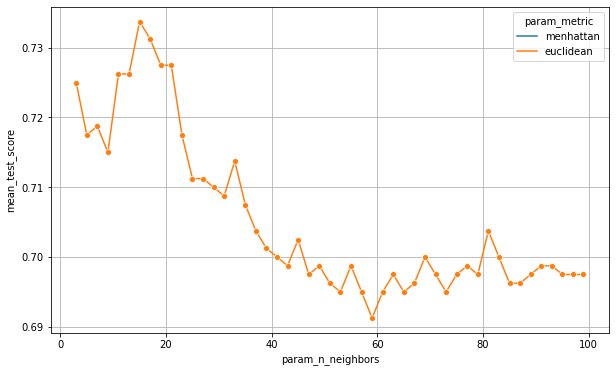

In [94]:
# 튜닝 과정 시각화
plt.figure(figsize=(10,6))
sns.lineplot(x='param_n_neighbors',y='mean_test_score',data=result,hue='param_metric',marker='o')
plt.grid()
plt.show()

In [95]:
pred1 = model.predict(x_val)

In [96]:
f1_score(pred1,y_val)

0.8164556962025317

### 2) 모델2

In [73]:
params = {'max_depth':range(3,10,2)}
model2 = GridSearchCV(RandomForestClassifier(random_state=1),params,cv=5)

In [74]:
model2.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': range(3, 10, 2)})

In [97]:
pred2 = model2.predict(x_val)

In [98]:
f1_score(pred2,y_val)

0.8360128617363345

### 3) 모델3

In [78]:
params = {'learning_rate':np.linspace(0.01,0.5,50),'n_estimators':[150]}

model3 = GridSearchCV(XGBClassifier(),params,cv=10)

In [79]:
model3.fit(x_train,y_train)

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 ]),
                         'n_estimators': [150]})

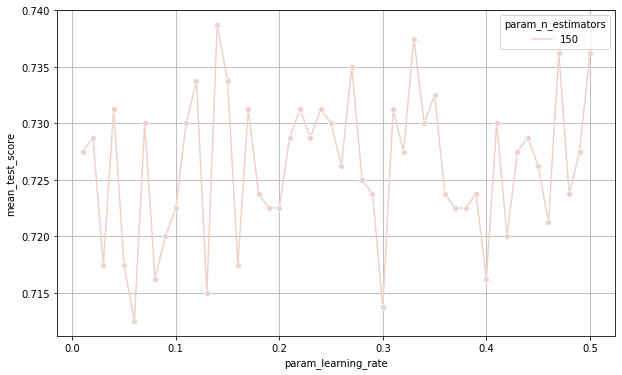

In [80]:
result = pd.DataFrame(model3.cv_results_)
plt.figure(figsize=(10,6))
sns.lineplot(x='param_learning_rate',y='mean_test_score',data=result,hue='param_n_estimators',marker='o')
plt.grid()
plt.show()

In [99]:
pred3 = model3.predict(x_val)

In [100]:
f1_score(pred3,y_val)

0.8068965517241379

### 4) 모델4

In [45]:
model4 = LGBMClassifier(max_depth=5,random_state=1)

In [46]:
model4.fit(x_train,y_train)

LGBMClassifier(max_depth=5, random_state=1)

In [104]:
pred4 = model4.predict(x_val)

In [105]:
f1_score(pred4,y_val)

0.8338983050847457

### 5) 모델5

In [49]:
model5 = CatBoostClassifier(max_depth=5,random_state=1)

In [50]:
model5.fit(x_train,y_train)

Learning rate set to 0.009366
0:	learn: 0.6896746	total: 48.7ms	remaining: 48.7s
1:	learn: 0.6863706	total: 52.2ms	remaining: 26s
2:	learn: 0.6828986	total: 56.3ms	remaining: 18.7s
3:	learn: 0.6795950	total: 63.3ms	remaining: 15.8s
4:	learn: 0.6759385	total: 67.4ms	remaining: 13.4s
5:	learn: 0.6724342	total: 71.6ms	remaining: 11.9s
6:	learn: 0.6690459	total: 77.5ms	remaining: 11s
7:	learn: 0.6660368	total: 80.3ms	remaining: 9.96s
8:	learn: 0.6629829	total: 84.8ms	remaining: 9.33s
9:	learn: 0.6597687	total: 89.3ms	remaining: 8.84s
10:	learn: 0.6568301	total: 93.7ms	remaining: 8.43s
11:	learn: 0.6538657	total: 97.8ms	remaining: 8.05s
12:	learn: 0.6506267	total: 103ms	remaining: 7.84s
13:	learn: 0.6472025	total: 108ms	remaining: 7.59s
14:	learn: 0.6444313	total: 112ms	remaining: 7.36s
15:	learn: 0.6415765	total: 116ms	remaining: 7.14s
16:	learn: 0.6388758	total: 120ms	remaining: 6.95s
17:	learn: 0.6359637	total: 124ms	remaining: 6.78s
18:	learn: 0.6332270	total: 128ms	remaining: 6.63s
19:

In [101]:
pred5 = model5.predict(x_val)

In [102]:
f1_score(pred5,y_val)

0.832214765100671

6) 모델6(딥러닝)

In [54]:
x_train.shape,x_val.shape

((800, 41), (200, 41))

In [83]:
keras.backend.clear_session()
il = keras.layers.Input(shape=(41,))
hl = keras.layers.Dense(256,activation='relu')(il)
hl = keras.layers.Dense(256,activation='relu')(hl)
hl = keras.layers.Dense(128,activation='relu')(hl)
hl = keras.layers.Dense(64,activation='relu')(hl)
hl = keras.layers.Dense(32,activation='relu')(hl)
ol = keras.layers.Dense(1,activation='sigmoid')(hl)
model6 = keras.models.Model(inputs=il,outputs=ol)
model6.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])
model6.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 41)]              0         
                                                                 
 dense (Dense)               (None, 256)               10752     
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33    

In [84]:
es = EarlyStopping(monitor = 'val_loss',
                   patience=7,min_delta=0,
                   restore_best_weights=True,
                   verbose=1)

history = model6.fit(x_train,y_train,
                        epochs=100,validation_split=0.2,callbacks=[es])
y_pred_dl = model6.predict(x_val)

Epoch 1/100
20/20 [==============================] - 5s 42ms/step - loss: 0.6125 - acc: 0.6969 - val_loss: 0.6187 - val_acc: 0.6375
Epoch 2/100
20/20 [==============================] - 0s 15ms/step - loss: 0.5359 - acc: 0.7188 - val_loss: 0.6224 - val_acc: 0.6500
Epoch 3/100
20/20 [==============================] - 0s 9ms/step - loss: 0.4895 - acc: 0.7531 - val_loss: 0.5772 - val_acc: 0.6812
Epoch 4/100
20/20 [==============================] - 0s 11ms/step - loss: 0.4461 - acc: 0.8141 - val_loss: 0.5421 - val_acc: 0.7312
Epoch 5/100
20/20 [==============================] - 0s 8ms/step - loss: 0.4002 - acc: 0.8391 - val_loss: 0.6723 - val_acc: 0.6687
Epoch 6/100
20/20 [==============================] - 0s 9ms/step - loss: 0.3783 - acc: 0.8422 - val_loss: 0.5384 - val_acc: 0.7312
Epoch 7/100
20/20 [==============================] - 0s 10ms/step - loss: 0.3216 - acc: 0.8781 - val_loss: 0.6042 - val_acc: 0.7188
Epoch 8/100
20/20 [==============================] - 0s 13ms/step - loss: 0.248

In [87]:
hist = history.history

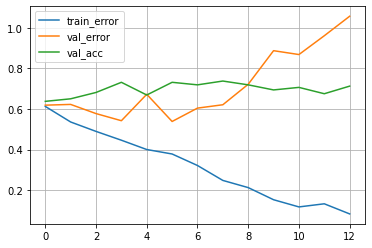

In [88]:
plt.plot(hist['loss'], label = 'train_error')
plt.plot(hist['val_loss'], label = 'val_error')
plt.plot(hist['val_acc'], label = 'val_acc')
plt.legend()
plt.grid()
plt.show()

In [103]:
pred6 = model6.predict(x_val)
pred6 = np.where(y_pred_dl >= .5, 1, 0)
f1_score(pred6,y_val)

7/7 [==============================] - 0s 4ms/step


0.8067796610169492

## 4.모델 성능 비교
* 모델 중 성능이 가장 좋은 모델은?

In [106]:
from sklearn.metrics import *
model_no = ['m1','m2', 'm3','m4', 'm5', 'm6']
algorithm = ['KNN','RF', 'XGB', 'LGB', 'CAB', 'DL']
pred = [pred1, pred2, pred3, pred4, pred5, pred6]

result = pd.DataFrame({'model_no':[], 'algorithm':[],'accuracy':[],'rec_0':[],'prec_0':[],'f1_0':[],'rec_1':[],'prec_1':[],'f1_1':[]})

for i in range(len(model_no)) :
    row = [model_no[i], algorithm[i]
           , accuracy_score(y_val, pred[i])
           , recall_score(y_val, pred[i], pos_label = 0)
           , precision_score(y_val, pred[i], pos_label = 0)
           , f1_score(y_val, pred[i], pos_label = 0)
           , recall_score(y_val, pred[i], pos_label = 1)
           , precision_score(y_val, pred[i], pos_label = 1)
           , f1_score(y_val, pred[i], pos_label = 1)]
    result.loc[i] = row

result

,model_no,algorithm,accuracy,rec_0,prec_0,f1_0,rec_1,prec_1,f1_1
0,m1,KNN,0.710,0.224138,0.500000,0.309524,0.908451,0.741379,0.816456
1,m2,RF,0.745,0.327586,0.612903,0.426966,0.915493,0.769231,0.836013
2,m3,XGB,0.720,0.465517,0.519231,0.490909,0.823944,0.790541,0.806897
3,m4,LGB,0.755,0.482759,0.595745,0.533333,0.866197,0.803922,0.833898
4,m5,CAB,0.750,0.448276,0.590909,0.509804,0.873239,0.794872,0.832215
5,m6,DL,0.715,0.413793,0.510638,0.457143,0.838028,0.777778,0.806780


In [107]:
print(confusion_matrix(y_val,pred3))
print(classification_report(y_val,pred3))

[[ 27  31]
 [ 25 117]]
              precision    recall  f1-score   support

           0       0.52      0.47      0.49        58
           1       0.79      0.82      0.81       142

    accuracy                           0.72       200
   macro avg       0.65      0.64      0.65       200
weighted avg       0.71      0.72      0.72       200

